
1. Perform Basic EDA
2. Check for missing values in all columns and replace them with the appropriate metric
3. Remove duplicate rows
4. Remove rows which have negative values in Quantity column
5. Add the columns - Month, Day and Hour for the invoice
6. How many orders made by the customers?
7. TOP 5 customers with higher number of orders
8. How much money spent by the customers?
9. TOP 5 customers with highest money spent
10. How many orders per month?
11. How many orders per day?
12. How many orders per hour?
13. How many orders for each country?
14. Orders trend across months
15. How much money spent by each country?

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import datetime 

In [2]:
# reading files
rider_provider='/Users/anusha._s/Desktop/Train with Shank/Python/Ecommerce/Ecommerce - UK Retailer (1).csv'
data=pd.read_csv(rider_provider, encoding = 'ISO-8859-1')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

# 1. Perform Basic EDA

In [5]:
#checking the datatypes for uses
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

"so according to the analysis there is just 'quantity' column which is in integer datatype but i will be using the float datatypes too for better analysis"

In [ ]:
# part a> Boxplot – All Numeric Variables

/Users/anusha._s/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


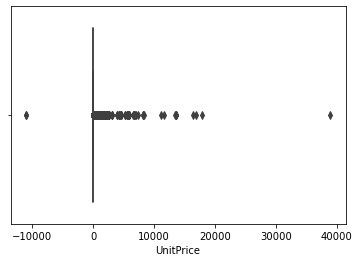

In [6]:
sns.boxplot(data["UnitPrice"]);

/Users/anusha._s/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


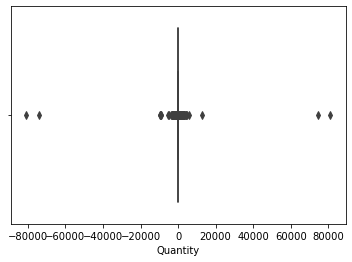

In [7]:
sns.boxplot(data["Quantity"]);

/Users/anusha._s/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


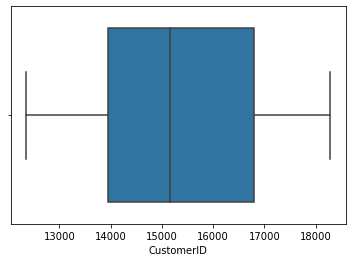

In [8]:
sns.boxplot(data["CustomerID"]);

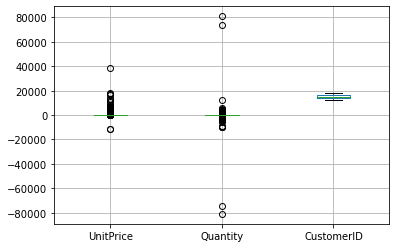

In [9]:
data.boxplot(column=["UnitPrice","Quantity","CustomerID"]);

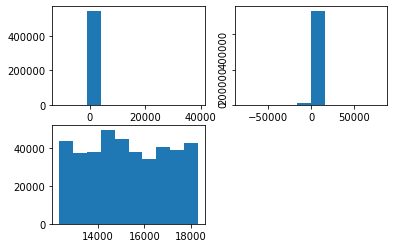

In [10]:
#part b> Histogram – All Numeric Variables
plt.subplot(2,2,1)
plt.hist(data["UnitPrice"])
plt.show;
plt.subplot(2,2,2)
plt.hist(data["Quantity"])
plt.yticks(rotation=90)
plt.show;
plt.subplot(2,2,3)
plt.hist(data["CustomerID"])
plt.show;

/Users/anusha._s/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


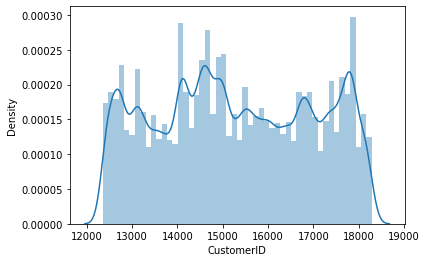

/Users/anusha._s/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


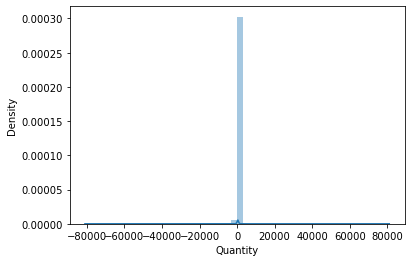

/Users/anusha._s/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


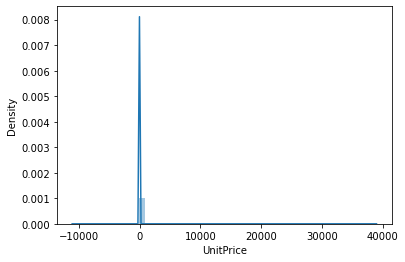

In [11]:
#part c> Distribution Plot – All Numeric Variables
sns.set
sns.distplot(data['CustomerID'])
plt.show()
sns.distplot(data['Quantity'])
plt.show()
sns.distplot(data['UnitPrice'])
plt.show()

In [ ]:
#part d>. Aggregation for all numerical Columns

In [12]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
x=data[["UnitPrice","Quantity","CustomerID"]]

In [14]:
x.head()

,UnitPrice,Quantity,CustomerID
0,2.55,6,17850.0
1,3.39,6,17850.0
2,2.75,8,17850.0
3,3.39,6,17850.0
4,3.39,6,17850.0


In [15]:
x.sum()

UnitPrice     2.498804e+06
Quantity      5.176450e+06
CustomerID    6.219476e+09
dtype: float64

In [16]:
x.mean()

UnitPrice         4.611114
Quantity          9.552250
CustomerID    15287.690570
dtype: float64

In [17]:
x.median()

UnitPrice         2.08
Quantity          3.00
CustomerID    15152.00
dtype: float64

In [18]:
x.std()

UnitPrice       96.759853
Quantity       218.081158
CustomerID    1713.600303
dtype: float64

In [19]:
x.max()

UnitPrice     38970.0
Quantity      80995.0
CustomerID    18287.0
dtype: float64

In [20]:
x.min()

UnitPrice    -11062.06
Quantity     -80995.00
CustomerID    12346.00
dtype: float64

In [ ]:
#part e>. Unique Values across all columns

In [21]:
for col in data:
    print(data[col].unique())

['536365' '536366' '536367' ... '581585' '581586' '581587']
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -2

In [22]:
data.count(axis=0)

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [23]:
data.nunique(axis=0)

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
#part f>. Duplicate values across all columns

In [25]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [26]:
data.shape

(541909, 8)

In [27]:
data=data.drop_duplicates(keep=False)

In [28]:
data.shape

(531762, 8)

In [29]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#part g>. Correlation – Heatmap - All Numeric Variables

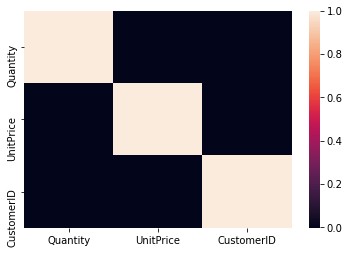

In [30]:
sns.heatmap(data.corr())
plt.show()

In [ ]:
#part h>. Regression Plot - All Numeric Variables

<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

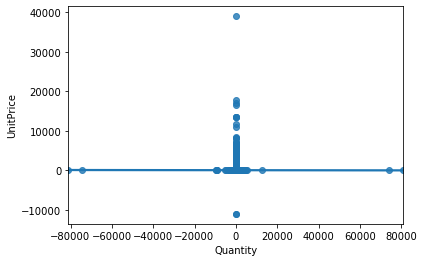

In [31]:
sns.regplot(x=data.Quantity, y=data.UnitPrice)#"Quantity","UnitPrice","CustomerID"

<AxesSubplot:xlabel='Quantity', ylabel='CustomerID'>

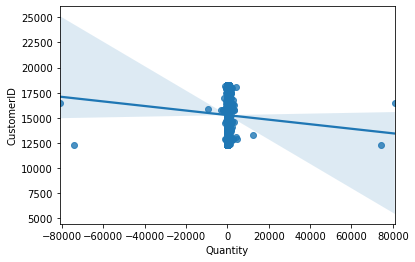

In [32]:
sns.regplot(x=data.Quantity, y=data.CustomerID)

In [ ]:
sns.regplot(x=data.CustomerID, y=data.UnitPrice)

# 5. Add the columns - Month, Day and Hour for the invoice

In [ ]:
data.head()

In [34]:
#converting the string column to date datatypes....
data.InvoiceDate=pd.to_datetime(data.InvoiceDate)

In [35]:
''' adding month day and hour columns with the data which i mapped through InvoiceDate column to take in the data'''
data.insert(loc=1, column='Year_Month', value=data.InvoiceDate.map(lambda x: 100*x.year + x.month))
data.insert(loc=2, column='Month', value=data.InvoiceDate.dt.month)
# considering +1 to make it monday as we start our week from Monday and thus sunday will be taken as 7....
data.insert(loc=3, column='day', value=(data.InvoiceDate.dt.dayofweek)+1)
data.insert(loc=4, column='hour', value=data.InvoiceDate.dt.hour)
data['Revenue'] = data['Quantity'] * data['UnitPrice']

In [36]:
'''checking the changes made'''
data

,InvoiceNo,Year_Month,Month,day,hour,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,201012,12,3,8,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,201112,12,5,12,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,201112,12,5,12,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,201112,12,5,12,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,201112,12,5,12,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
#part i>. Bar Plot – Every Categorical Variable vs every Numerical Variable

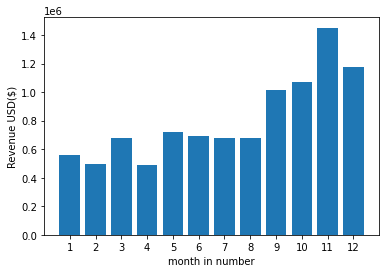

In [37]:
# Bar Plot 
result=data.groupby('Month').sum()
month=range(1,13)
plt.bar(month,result['Revenue'])
plt.xticks(month)
plt.xlabel('month in number')
plt.ylabel('Revenue USD($)')
plt.show()

In [ ]:
#part j>. Pair plot - All Numeric Variables

In [ ]:
# Pair plot allows us to see both distribution of single variables and relationships between two variables.
sns.pairplot(data,vars=["Quantity","UnitPrice","Revenue"])
plt.show()

In [ ]:
#part k>. Line chart to show the trend of data - All Numeric/Date Variables

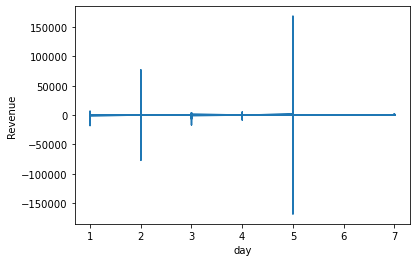

In [38]:
#Line chart to show the trend of data 

plt.plot(data['day'],data['Revenue'])
plt.xlabel('day')
plt.ylabel('Revenue')
plt.show()

In [ ]:
#part l>. Plot the skewness - All Numeric Variables

In [39]:
#skewness 
data.skew(axis=0,skipna=True)

Year_Month     -3.056270
Month          -0.407871
day             0.470626
hour            0.000355
Quantity       -0.263791
UnitPrice     184.756896
CustomerID      0.038277
Revenue        -0.957336
dtype: float64

In [40]:
data.skew(axis=1,skipna=True)

0         2.785992
1         2.785996
2         2.785999
3         2.785996
4         2.785996
            ...   
541904    2.806816
541905    2.806814
541906    2.806817
541907    2.806817
541908    2.806815
Length: 531762, dtype: float64

In [ ]:
#Distribition plot (Skewed +ve)

/Users/anusha._s/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


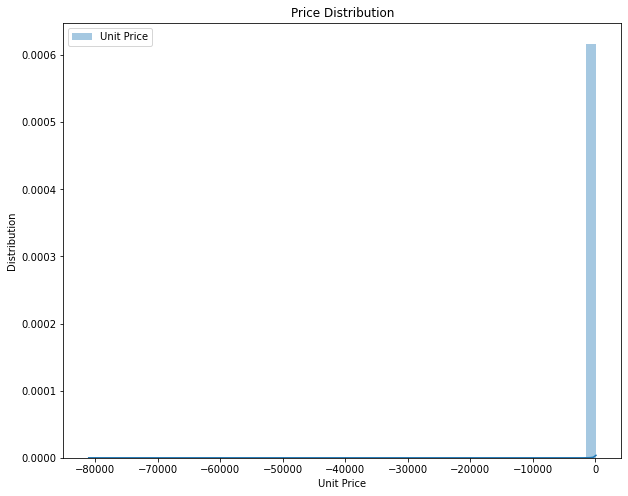

In [41]:
# If a data set has a positive skew, 
# but the mean of the returns is negative, it means that overall performance is negative
# but here mean is positive hence performance is considerd as to be good
plt.subplots(figsize=(10,8))
sns.distplot(data.Quantity[data.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

# 2. Check for missing values in all columns and replace them with the appropriate metric(Mean/Median/Mode)

In [42]:
#checking the missing values in dataset
print('The values which are missing in  E-commerce dataset are :-\n{}'.format(data.isnull().sum()))

The values which are missing in  E-commerce dataset are :-
InvoiceNo           0
Year_Month          0
Month               0
day                 0
hour                0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134995
Country             0
Revenue             0
dtype: int64


In [43]:
'''the description and customer id are the columns with missing values and to deal with ot we need more information of the dataset thus:-

'''
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531762 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531762 non-null  object        
 1   Year_Month   531762 non-null  int64         
 2   Month        531762 non-null  int64         
 3   day          531762 non-null  int64         
 4   hour         531762 non-null  int64         
 5   StockCode    531762 non-null  object        
 6   Description  530308 non-null  object        
 7   Quantity     531762 non-null  int64         
 8   InvoiceDate  531762 non-null  datetime64[ns]
 9   UnitPrice    531762 non-null  float64       
 10  CustomerID   396767 non-null  float64       
 11  Country      531762 non-null  object        
 12  Revenue      531762 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 56.8+ MB


In [44]:
'''thus from the analysis we need to replace the missing value of the description column with the mode is having a non numerical value and mode best and only suitable Statistcal method to do so'''
data.Description.fillna(data.Description.mode()[0],inplace = False)

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 531762, dtype: object

In [45]:
'''since the CustomerID column is having a numeric data type i.e float64 thus the median will be best to replace with the missing values'''
data.CustomerID.fillna(data.CustomerID.median(),inplace=False)

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 531762, dtype: float64

In [46]:
#checking the status of changes made
print('The values which are missing in  E-commerce dataset  are :-\n{}'.format(data.isnull().sum()))

The values which are missing in  E-commerce dataset  are :-
InvoiceNo           0
Year_Month          0
Month               0
day                 0
hour                0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134995
Country             0
Revenue             0
dtype: int64


# 3. Remove duplicate rows

In [47]:
#we already deleted duplicates but writing syntax for reference
#checking the availablity of dublicate rows in the dataset
data.duplicated().sum()

0

In [48]:
print("thus the duplicate values are:-")
data.loc[data.duplicated(),:]

thus the duplicate values are:-


,InvoiceNo,Year_Month,Month,day,hour,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue


In [49]:
#deleting the duplicate rows keeping the first one which is the original one 
data.drop_duplicates(subset=None, keep='first',inplace=True)

In [50]:
#checking the status of removal of duplicate rows
data.duplicated().sum()

0

# 4. Remove rows which have negative values in Quantity column

In [51]:
# checking the count of the dataset before removing the negative values
data.describe()

,Year_Month,Month,day,hour,Quantity,UnitPrice,CustomerID,Revenue
count,531762.000000,531762.000000,531762.000000,531762.000000,531762.000000,531762.000000,396767.000000,531762.000000
mean,201099.727357,7.537054,3.417196,13.075664,9.683926,4.653050,15275.108517,18.252512
std,25.740622,3.508356,1.835416,2.451513,220.114371,97.677687,1714.401947,382.389380
min,201012.000000,1.000000,1.000000,6.000000,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,201103.000000,5.000000,2.000000,11.000000,1.000000,1.250000,13919.000000,3.750000
50%,201107.000000,8.000000,3.000000,13.000000,3.000000,2.080000,15132.000000,9.900000
75%,201110.000000,11.000000,5.000000,15.000000,10.000000,4.130000,16779.000000,17.700000
max,201112.000000,12.000000,7.000000,20.000000,80995.000000,38970.000000,18287.000000,168469.600000


In [52]:
data = data[data.Quantity > 0]

In [53]:
# checking the count of the dataset to confirm the removal of negative values if any:
data.describe()

,Year_Month,Month,day,hour,Quantity,UnitPrice,CustomerID,Revenue
count,521207.000000,521207.000000,521207.000000,521207.000000,521207.000000,521207.000000,387923.000000,521207.000000
mean,201099.726433,7.544056,3.421316,13.073086,10.801971,3.885456,15281.620997,20.331983
std,25.754322,3.508068,1.840494,2.446585,158.306723,42.210671,1713.954340,273.507891
min,201012.000000,1.000000,1.000000,6.000000,1.000000,-11062.060000,12346.000000,-11062.060000
25%,201103.000000,5.000000,2.000000,11.000000,1.000000,1.250000,13941.000000,3.950000
50%,201107.000000,8.000000,3.000000,13.000000,4.000000,2.080000,15144.000000,9.950000
75%,201110.000000,11.000000,5.000000,15.000000,12.000000,4.130000,16788.000000,17.700000
max,201112.000000,12.000000,7.000000,20.000000,80995.000000,13541.330000,18287.000000,168469.600000


# 5. Add the columns - Month, Day and Hour for the invoice

In [54]:
#Already completed this step above
'''checking the changes made'''
data

,InvoiceNo,Year_Month,Month,day,hour,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,201012,12,3,8,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,201112,12,5,12,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,201112,12,5,12,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,201112,12,5,12,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,201112,12,5,12,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


# 6. How many orders made by the customers?

In [55]:
#groupig the customer id and their invoice to exmamin the order made by the customers
data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


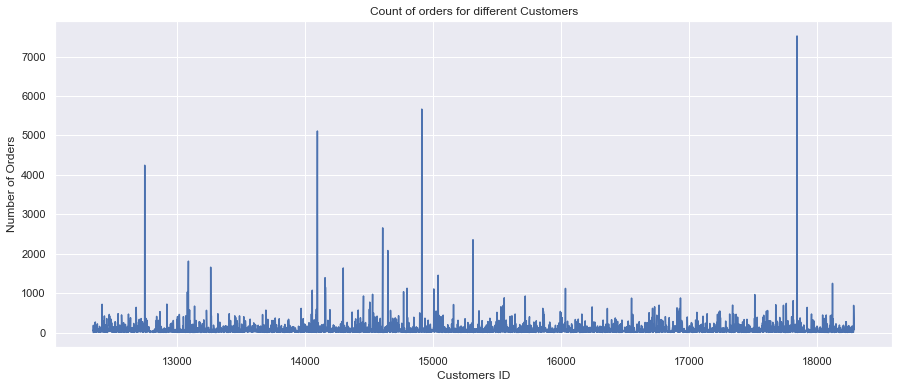

In [56]:
sns.set()
orders = data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Count of orders for different Customers')
plt.show()

# 7. TOP 5 customers with higher number of orders

In [57]:
print('The TOP 5 customers with max no of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with max no of orders...


,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7523
1888,14911.0,EIRE,5667
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4243
1670,14606.0,United Kingdom,2654


# 8. How much money spent by the customers?

In [ ]:
mkr_gone = data.groupby(by=['CustomerID','Country'], as_index=False)['UnitPrice'].sum()

sns.set()
plt.subplots(figsize=(15,6))
plt.plot(mkr_gone.CustomerID, mkr_gone.UnitPrice)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# 9. TOP 5 customers with highest money spent

In [ ]:
print('The TOP 5 customers with max no of orders...')
mkr_gone.sort_values(by='UnitPrice', ascending=False).head()

In [ ]:
data.head()#just wanna see the column titles

# 10. How many orders per month?

In [ ]:
sns.set()
ax = data.groupby('InvoiceNo')['Year_Month'].unique().value_counts().sort_index()
ax.plot(kind="bar",title="number of orders in month ",fontsize=15)
plt.figsize=(15,6)
plt.xlabel("year_month",fontsize=15)
plt.ylabel("number of orders",fontsize=15)

# 11. How many orders per day?

In [ ]:
sns.set()
temp1=data.groupby('InvoiceNo')['day'].unique().value_counts().sort_index()
temp1.plot(kind="bar", title="Number of orders per day")
plt.figsize=(15,6)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

# 12. How many orders per hour?

In [ ]:
sns.set()
temp2=data.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index()
temp2.plot(kind="bar",title="Number of orders per hour")
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.show()

# 13. How many orders for each country?

In [ ]:
sns.set()
group_country_orders = data.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries')
plt.show()

In [ ]:
#'since our dataset is baised on united kingdom thus it is being difficult to analyse the data of other countries as uk is having most of the data and suppressing others so to analyse other country data it will be better to drop it a while '

In [ ]:
sns.set()
group_country_orders = data.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country without uk 
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh',fontsize=12)
plt.xlabel('Number of Orders',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Number of Orders for different Countries',fontsize=12)
plt.show()

# 14. Orders trend across months

In [ ]:
sns.set()
ord_mon=data.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index()
ord_mon.plot(kind="line",title="trend of order across month",fontsize=15)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Orders",fontsize=15)

# 15. How much money spent by each country?

In [ ]:
sns.set()
panda_money = data.groupby('Country')['UnitPrice'].sum().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
panda_money.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

Again the problem arrose that data is baised towards united kingdom thus removing uk will improve the analysis

In [ ]:
panda_money = data.groupby('Country')['UnitPrice'].sum().sort_values()
del panda_money['United Kingdom']

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
panda_money.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()